## Simple Linear Regression

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
%matplotlib  inline

In [24]:
df =pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

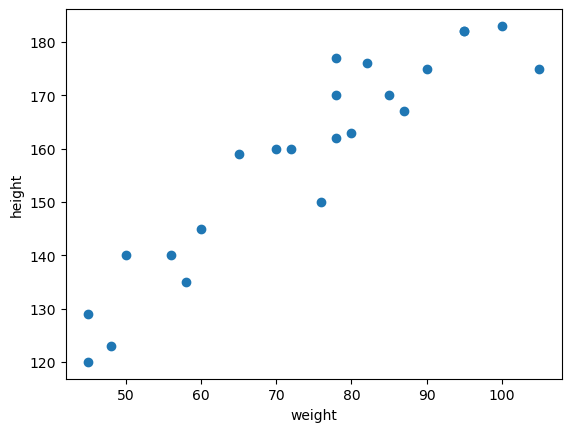

In [25]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('weight')
plt.ylabel('height')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [27]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [28]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [29]:
## divide our dataset into dependdent, independent features
x= df[['Weight']] ##independent features
y = df['Height']  ##dependent features

In [30]:
x.shape,y.shape

((23, 1), (23,))

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
 X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state= 42)

In [33]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [34]:
y_train.shape, y_test.shape

((18,), (5,))

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
stnd= StandardScaler()

In [37]:
X_train = stnd.fit_transform(X_train)

In [38]:
X_test = stnd.transform(X_test)

In [39]:
X_test, X_train

(array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]),
 array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]))

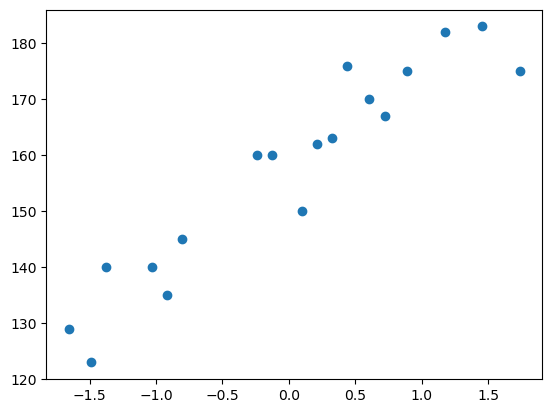

In [40]:
plt.scatter(X_train,y_train)


In [41]:
stnd.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [42]:
# Model Training

from sklearn.linear_model import LinearRegression


In [43]:
regressor = LinearRegression()

In [44]:
## Fitting and training the train data
regressor.fit(X_train, y_train)

LinearRegression()

In [46]:
regressor.intercept_

157.5

In [47]:
regressor.coef_

array([17.03440872])

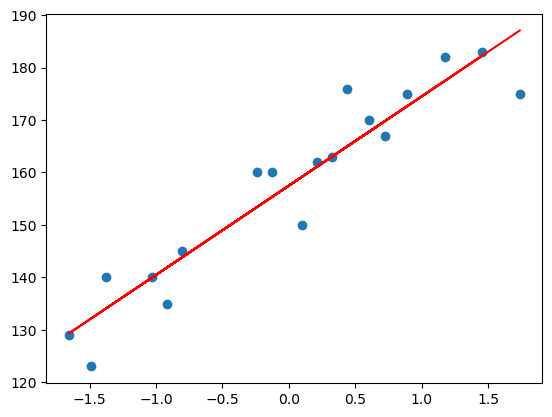

In [52]:
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train),color = 'r')

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [54]:
## Prediction of test data
y_pred_test = regressor.predict(X_test)

In [55]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [56]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## performance_Matrics MAE,MSE, RMSE

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [62]:
mse =  mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r ssquared
## R square 
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [64]:
from sklearn.metrics import r2_score

In [65]:
score = r2_score(y_test, y_pred_test)

In [66]:
score

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [67]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [68]:
stnd

StandardScaler()

In [69]:
regressor

LinearRegression()